In [10]:
import numpy as np
import matplotlib.pylab as plt

<AxesSubplot:>

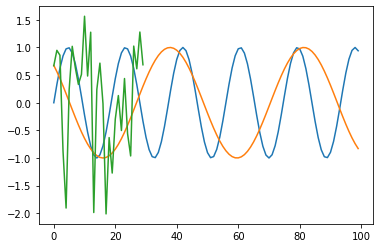

In [46]:
import pandas as pd

x=np.linspace(0,50,100)
ts1=pd.Series(np.sin(x/1.5))
ts2=pd.Series(np.sin(x/3.5+2.4))
ts3=pd.Series(np.random.normal(0,1,30))
ts1.plot()
ts2.plot()
ts3.plot()

In [50]:
# Naive DTW

def DTWNaive(ts1, ts2):
    
    DTW = {}
    s1 = np.size(ts1)
    s2 = np.size(ts2)
    
    # initializing the DTW matrix
    for i in range(s1):
        DTW[(i,-1)] = float('Inf')
    
    for j in range(s2):
        DTW[(-1,j)] = float('Inf')
        
    DTW[(-1,-1)] = 0
    
    for i in range(s1):
        for j in range(s2):
            # distance
            dist = (ts1[i] - ts2[j])**2
            # Cumulative alignment cost
            DTW[(i,j)] = dist + min(DTW[(i-1,j)],DTW[(i,j-1)],DTW[(i-1,j-1)])

    return np.sqrt(DTW[s1-1, s2-1]/(s1+s2))

In [52]:
DTWNaive(ts1,ts3)

0.4476946420405344

In [56]:
# DTW with Sakoe-Chiba band

def DTWSC(ts1, ts2, w):
    
    DTW = {}
    s1 = np.size(ts1)
    s2 = np.size(ts2)
    
    w = max(np.abs(s1-s2), w)
    
    
     # initializing the DTW matrix
    for i in range(-1, s1):
        for j in range(-1, s2):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
        
    DTW[(-1,-1)] = 0
    
    for i in range(s1):
        lb = max(0, i-w)
        ub = min(s2, i+w)
        for j in range(lb,ub):
            # distance
            dist = (ts1[i] - ts2[j])**2
            # Cumulative alignment cost
            DTW[(i,j)] = dist + min(DTW[(i-1,j)],DTW[(i,j-1)],DTW[(i-1,j-1)])

    return np.sqrt(DTW[s1-1, s2-1]/(s1+s2))
    
    
    

In [58]:
DTWSC(ts1, ts2, 10)

0.4238858956137159

In [65]:
def LB_Keogh(ts1, ts2, r):
    
    LB_sum=0
    
    s1 = np.size(ts1)
    s2 = np.size(ts2)
    
    r = max(np.abs(s1-s2), r)
    
    for ind,i in enumerate(ts1):
        
        lower_bound=min(ts2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(ts2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [69]:
LB_Keogh(ts1, ts3, 20)

0.02222760115540336